In [ ]:
import pandas as pd
data= pd.read_csv('/content/Bank_Personal_Loan_Modelling.csv')
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

data.columns = data.columns.str.strip()

attributes = ['Income', 'CCAvg', 'Mortgage', 'Education']

weights = {
    'Income': 0.4,
    'CCAvg': 0.3,
    'Mortgage': 0.2,
    'Education': 0.1
}

scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data[attributes])

data['FinancialHealthScore'] = (data_normalized * [weights[attr] for attr in attributes]).sum(axis=1)

min_score = 0
max_score = 100
data['FinancialHealthScore'] = ((data['FinancialHealthScore'] - data['FinancialHealthScore'].min()) /
                               (data['FinancialHealthScore'].max() - data['FinancialHealthScore'].min())) * (max_score - min_score) + min_score

print(data[['Income', 'CCAvg', 'Mortgage', 'Education', 'FinancialHealthScore']])


      Income  CCAvg  Mortgage  Education  FinancialHealthScore
0         49    1.6         0          1             14.039098
1         34    1.5         0          1             10.499508
2         11    1.0         0          1              3.876086
3        100    2.7         0          2             34.446052
4         45    1.0         0          2             16.867363
...      ...    ...       ...        ...                   ...
4995      40    1.9         0          3             24.657870
4996      15    0.4        85          1              5.736755
4997      24    0.3         0          3             15.730094
4998      49    0.5         0          2             15.994179
4999      83    0.8         0          1             18.520024

[5000 rows x 5 columns]


# ****Segmentation and Profiling:****

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


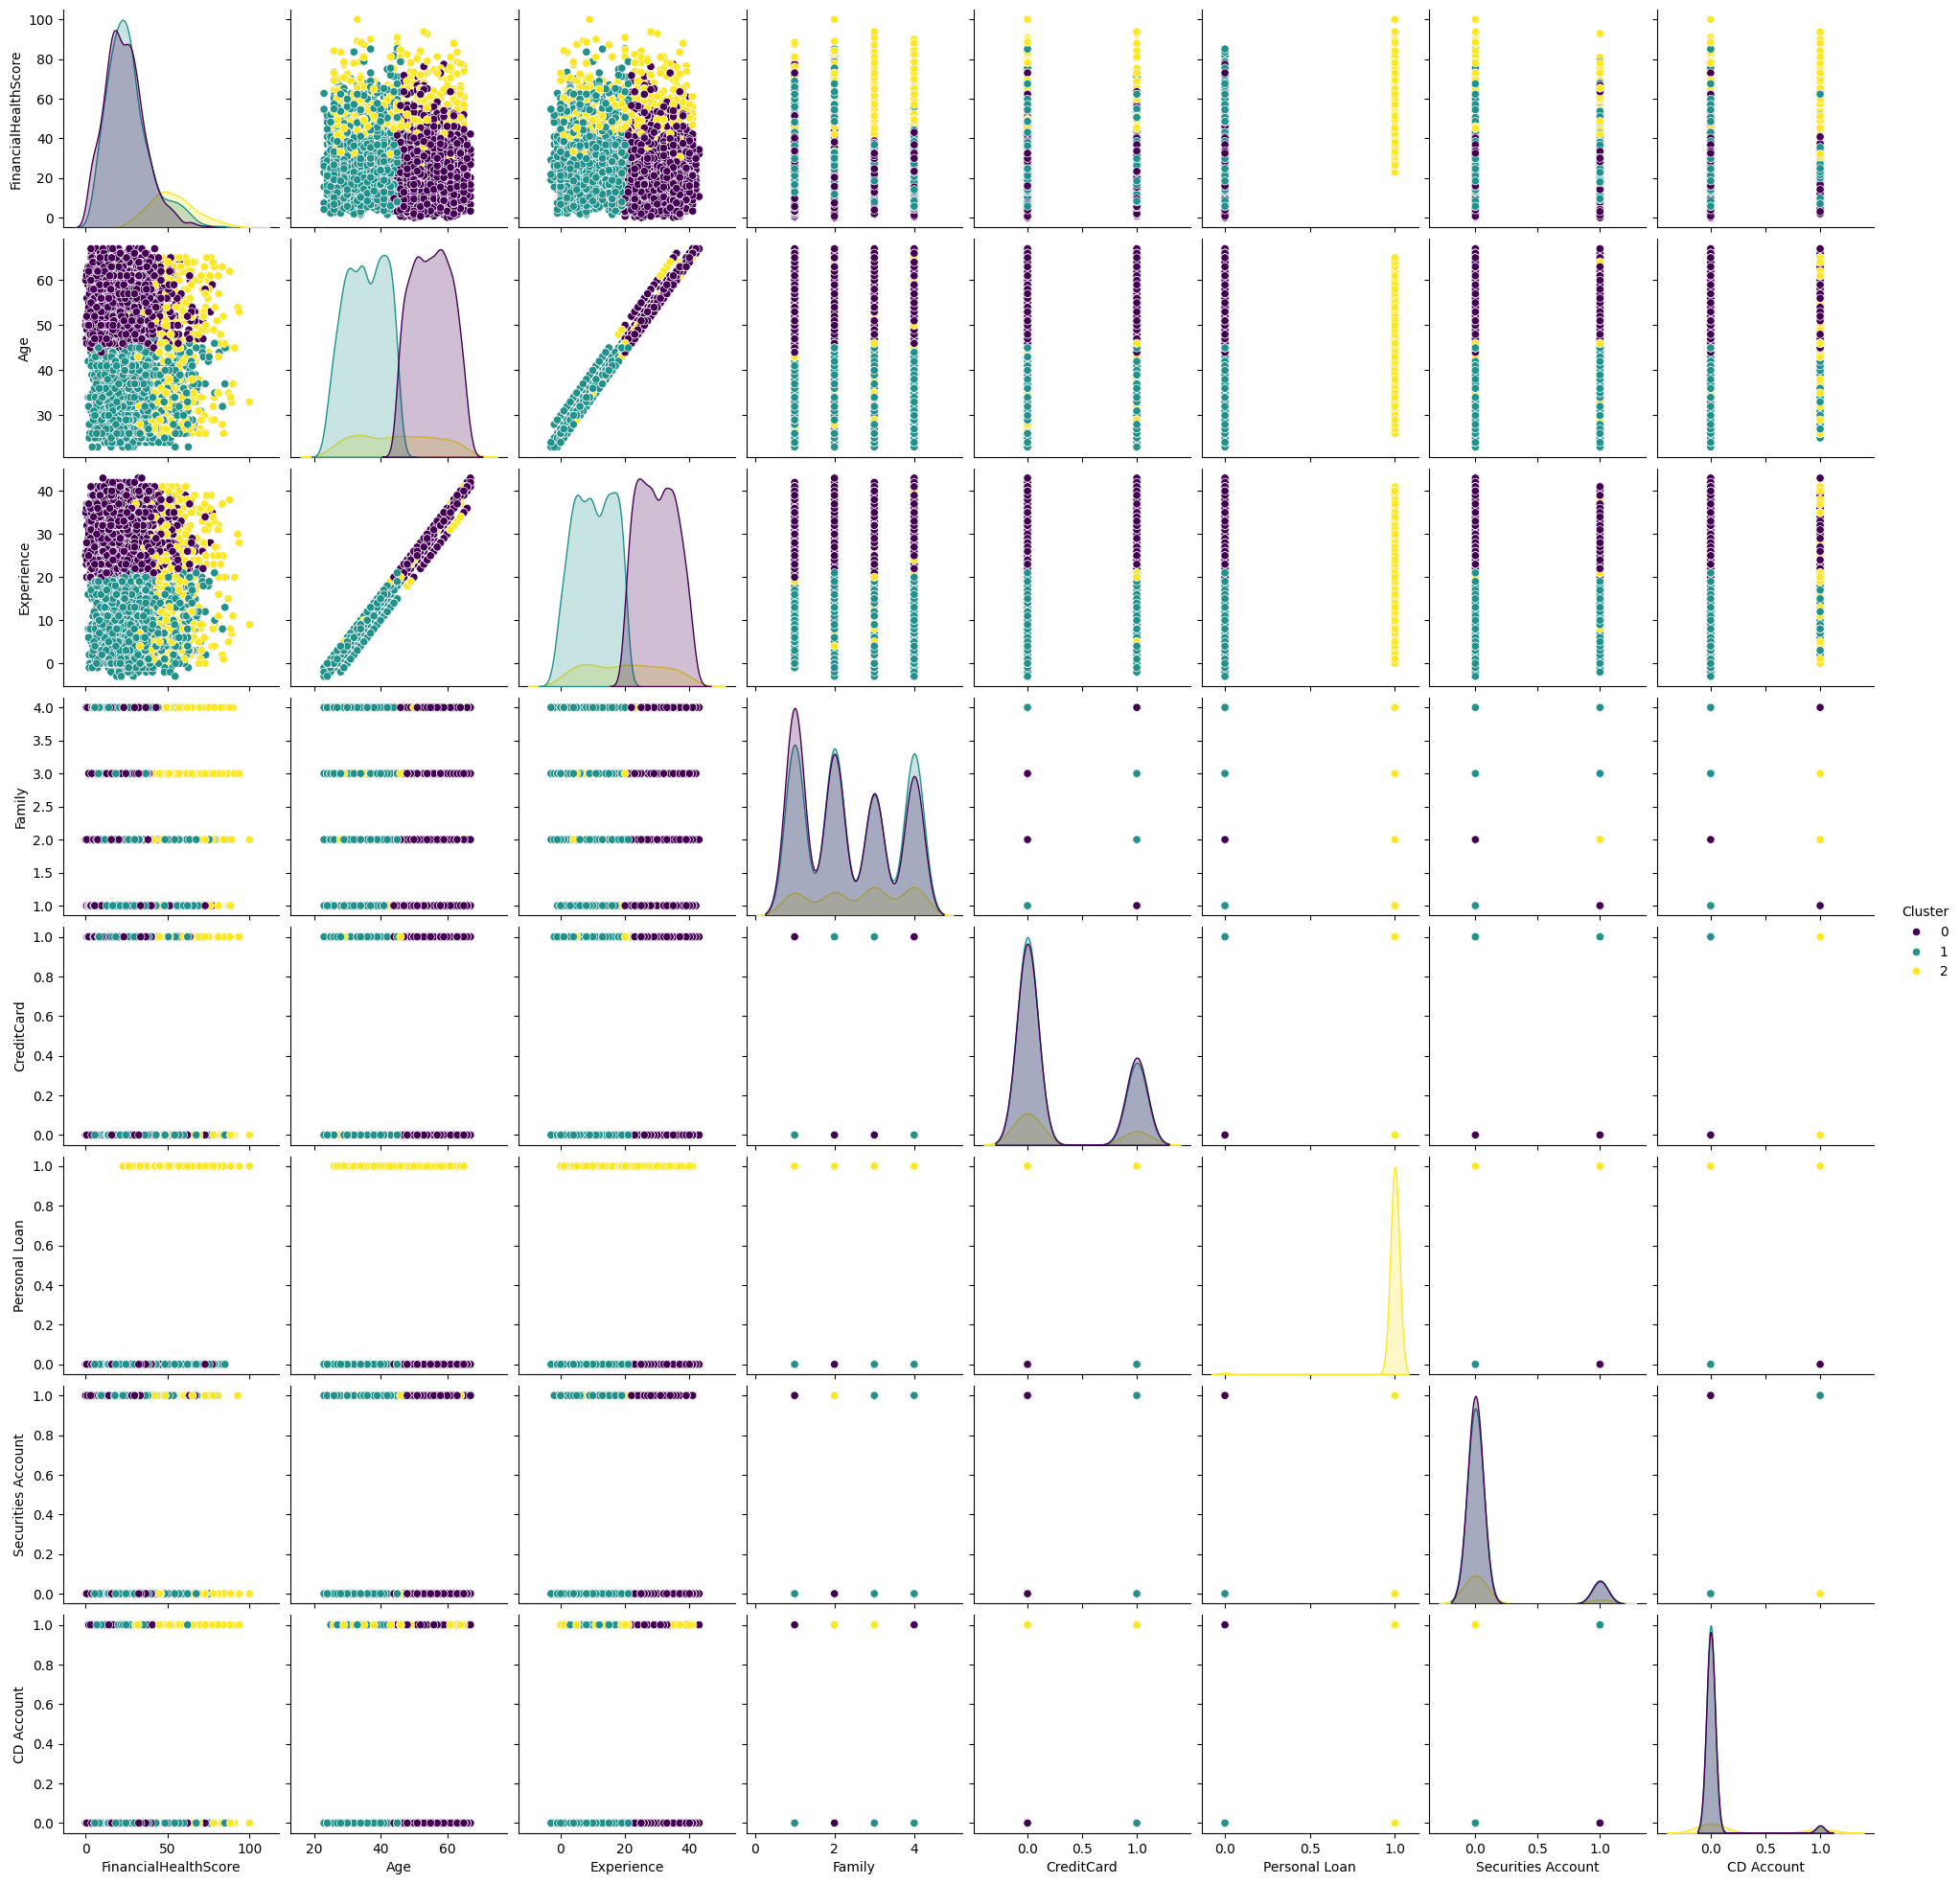

         FinancialHealthScore        Age  Experience    Family  CreditCard  \
Cluster                                                                      
0                   23.743780  55.191546   29.901365  2.306913    0.302510   
1                   25.973401  35.426726   10.246325  2.441425    0.283742   
2                   53.173679  45.080579   19.863636  2.607438    0.301653   

         Personal Loan  Securities Account  CD Account  
Cluster                                                 
0             0.000000            0.097754    0.036548  
1             0.000000            0.106459    0.033408  
2             0.991736            0.126033    0.297521  


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have the FinancialHealthScore column in your DataFrame

# Select relevant attributes for segmentation and profiling
segmentation_attributes = ['Age', 'Experience', 'Family', 'CreditCard', 'Personal Loan', 'Securities Account', 'CD Account']

# Create a DataFrame with the selected attributes
segmentation_data = data[['FinancialHealthScore'] + segmentation_attributes]

# Drop any rows with missing values
segmentation_data = segmentation_data.dropna()

# Standardize the data for clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
segmentation_data_scaled = scaler.fit_transform(segmentation_data)

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters
segmentation_data['Cluster'] = kmeans.fit_predict(segmentation_data_scaled)

# Visualize the clusters
sns.pairplot(segmentation_data, hue='Cluster', palette='viridis', diag_kind='kde')
plt.show()

# Profile each segment
segment_profiles = segmentation_data.groupby('Cluster').mean()

# Display the segment profiles
print(segment_profiles)


# Income vs. Expenditure Analysis:

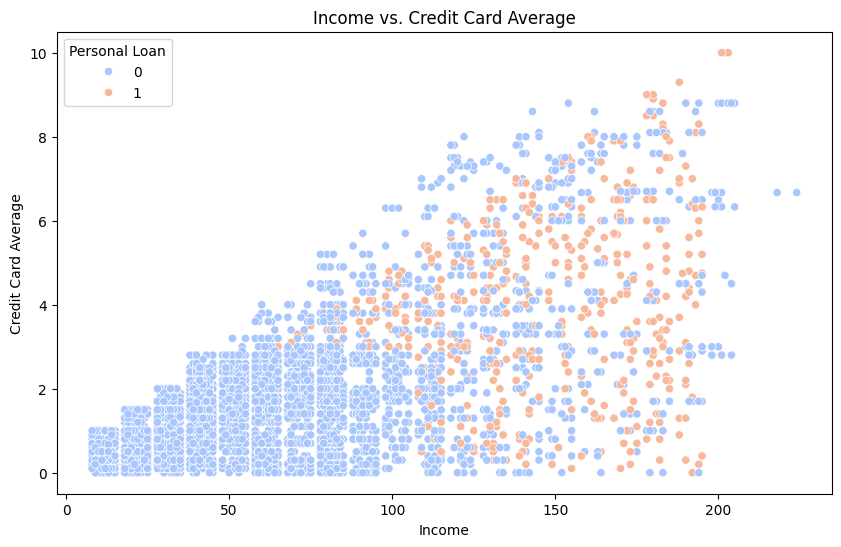

Accuracy: 0.907

Confusion Matrix:
 [[873  22]
 [ 71  34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       895
           1       0.61      0.32      0.42       105

    accuracy                           0.91      1000
   macro avg       0.77      0.65      0.69      1000
weighted avg       0.89      0.91      0.89      1000



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have the 'Income', 'CCAvg', and 'Personal Loan' columns in your DataFrame

# Select relevant attributes for the analysis
analysis_attributes = ['Income', 'CCAvg', 'Personal Loan']

# Create a DataFrame with the selected attributes
analysis_data = data[analysis_attributes]

# Drop any rows with missing values
analysis_data = analysis_data.dropna()

# Visualize the relationship between 'Income' and 'CCAvg'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='CCAvg', hue='Personal Loan', data=analysis_data, palette='coolwarm')
plt.title('Income vs. Credit Card Average')
plt.xlabel('Income')
plt.ylabel('Credit Card Average')
plt.show()

# Split the data into training and testing sets
X = analysis_data[['Income', 'CCAvg']]
y = analysis_data['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# **Loan Acceptance Modeling:**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you already have the 'Income', 'Experience', 'Education', 'Mortgage', and 'Personal Loan' columns in your DataFrame

# Select relevant attributes for the loan acceptance model
loan_attributes = ['Income', 'Experience', 'Education', 'Mortgage', 'Personal Loan']

# Create a DataFrame with the selected attributes
loan_data = data[loan_attributes]

# Drop any rows with missing values
loan_data = loan_data.dropna()

# Split the data into features (X) and target variable (y)
X = loan_data.drop('Personal Loan', axis=1)
y = loan_data['Personal Loan']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.947

Confusion Matrix:
 [[886   9]
 [ 44  61]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       895
           1       0.87      0.58      0.70       105

    accuracy                           0.95      1000
   macro avg       0.91      0.79      0.83      1000
weighted avg       0.94      0.95      0.94      1000



# **Geospatial Analysis:**

In [ ]:
pip install geopy

In [ ]:
from geopy.geocoders import Nominatim

# Extract unique ZIP Codes from the data
unique_zip_codes = data['ZIP Code'].unique()

# Initialize geolocator
geolocator = Nominatim(user_agent="my_geocoder")

# Create a DataFrame to store coordinates
coordinates_df = pd.DataFrame(columns=['ZIP Code', 'Latitude', 'Longitude'])

# Geocode each unique ZIP Code
for zip_code in unique_zip_codes:
    location = geolocator.geocode(str(zip_code))  # Convert to string to handle non-integer ZIP Codes
    if location:
        coordinates_df = coordinates_df.append({
            'ZIP Code': zip_code,
            'Latitude': location.latitude,
            'Longitude': location.longitude
        }, ignore_index=True)
    else:
        print(f"Couldn't find coordinates for ZIP Code {zip_code}")

# Merge the coordinates back to the original DataFrame based on 'ZIP Code'
data_1 = pd.merge(data, coordinates_df, on='ZIP Code', how='left')

# Display the resulting DataFrame with latitude and longitude information
print(data_1)


<ipython-input-13-63bd0d8d16c0>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coordinates_df = coordinates_df.append({
<ipython-input-13-63bd0d8d16c0>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coordinates_df = coordinates_df.append({
<ipython-input-13-63bd0d8d16c0>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coordinates_df = coordinates_df.append({
<ipython-input-13-63bd0d8d16c0>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coordinates_df = coordinates_df.append({
<ipython-input-13-63bd0d8d16c0>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0            

<ipython-input-13-63bd0d8d16c0>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coordinates_df = coordinates_df.append({


In [ ]:
import pandas as pd
import geopandas as gpd
import folium

# Assuming you have a DataFrame named 'data_1' with 'Latitude', 'Longitude', and 'FinancialHealthScore' columns

# Create a folium map centered at the mean coordinates
map_center = [data_1['Latitude'].mean(), data_1['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Add markers for each data point with pop-up information
for idx, row in data_1.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']],
                  popup=f"Financial Health: {row['FinancialHealthScore']}",
                  icon=folium.Icon(color='blue')).add_to(m)

# Save the folium map as an HTML file
m.save('financial_health_map.html')


In [ ]:
from folium import Map, Marker, Popup
from folium import IFrame
import folium

# Create a folium map centered at the mean coordinates
map_center = [data_1['Latitude'].mean(), data_1['Longitude'].mean()]
folium_map = Map(location=map_center, zoom_start=10)

# Add markers for each data point with pop-up information
for idx, row in data_1.iterrows():
    popup_content = f"Financial Health: {row['FinancialHealthScore']}"
    popup = Popup(IFrame(html=popup_content, width=300, height=100), max_width=300)
    marker = Marker([row['Latitude'], row['Longitude']], popup=popup, icon=folium.Icon(color='blue'))
    folium_map.add_child(marker)

# Save the Folium map as an HTML file
folium_map.save("financial_health_map.html")

# Display the HTML file using an IFrame
from IPython.display import IFrame

IFrame(src='financial_health_map.html', width=700, height=600)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Cross-Selling Opportunities:**

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming your data is stored in a DataFrame called 'data'
# Extract relevant columns for analysis
credit_card = data['CreditCard']
securities_account = data['Securities Account']
cd_account = data['CD Account']

# Create a contingency table
contingency_table = pd.crosstab(credit_card, [securities_account, cd_account], margins=True)

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform the Chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)
print("\nChi-square Statistic:", chi2)
print("P-value:", p)

# Interpret the results
alpha = 0.05
print("\nSignificance Level (alpha):", alpha)
print("Is the relationship significant?")
if p < alpha:
    print("Yes, the relationship is significant. There may be a connection between owning a Credit Card and having a Securities Account or CD Account.")
else:
    print("No, there is not enough evidence to suggest a significant relationship.")


Contingency Table:
Securities Account     0         1        All
CD Account             0    1    0    1      
CreditCard                                   
0                   3138   13  330   49  3530
1                   1185  142   45   98  1470
All                 4323  155  375  147  5000

Chi-square Statistic: 450.31973406984156
P-value: 3.1581526488042265e-92

Significance Level (alpha): 0.05
Is the relationship significant?
Yes, the relationship is significant. There may be a connection between owning a Credit Card and having a Securities Account or CD Account.


# **Customer Satisfaction Insights:**

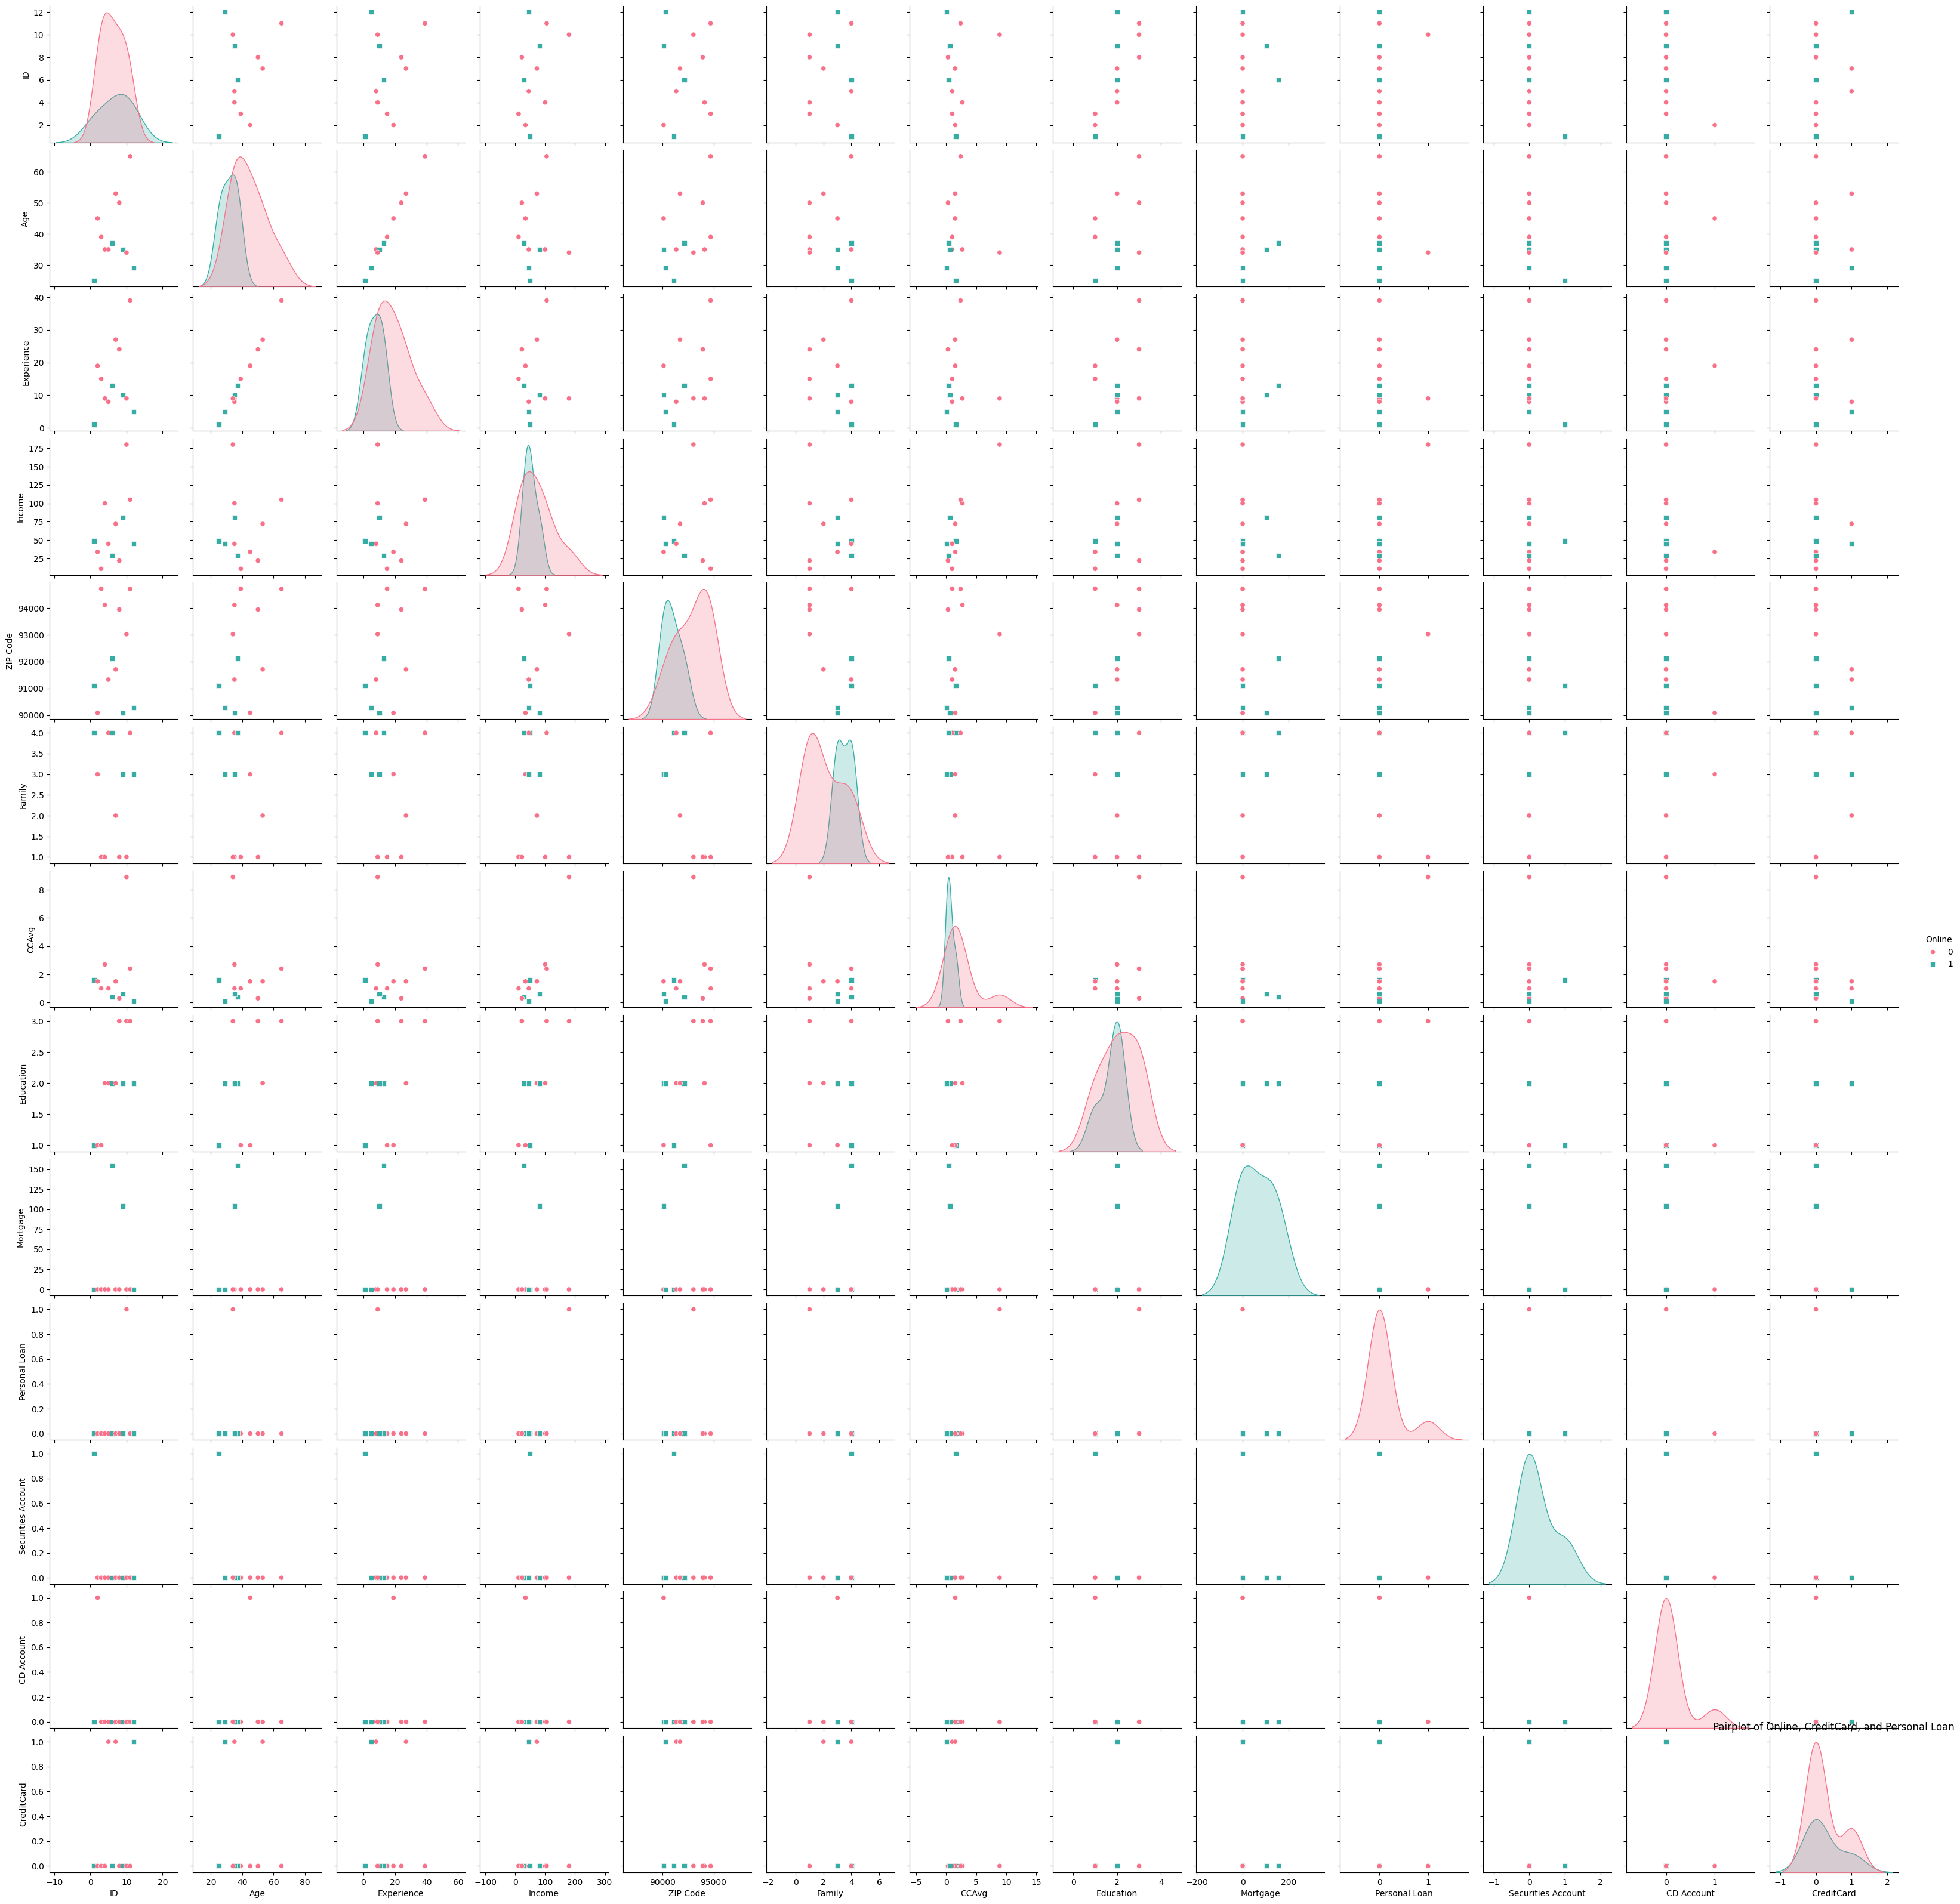

T-statistic: -0.6900655593423543, p-value: 0.5058518285908016
Decision Tree Accuracy: 0.6666666666666666


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Age': [25, 45, 39, 35, 35, 37, 53, 50, 35, 34, 65, 29],
    'Experience': [1, 19, 15, 9, 8, 13, 27, 24, 10, 9, 39, 5],
    'Income': [49, 34, 11, 100, 45, 29, 72, 22, 81, 180, 105, 45],
    'ZIP Code': [91107, 90089, 94720, 94112, 91330, 92121, 91711, 93943, 90089, 93023, 94710, 90277],
    'Family': [4, 3, 1, 1, 4, 4, 2, 1, 3, 1, 4, 3],
    'CCAvg': [1.6, 1.5, 1, 2.7, 1, 0.4, 1.5, 0.3, 0.6, 8.9, 2.4, 0.1],
    'Education': [1, 1, 1, 2, 2, 2, 2, 3, 2, 3, 3, 2],
    'Mortgage': [0, 0, 0, 0, 0, 155, 0, 0, 104, 0, 0, 0],
    'Personal Loan': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    'Securities Account': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'CD Account': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'Online': [1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1],
    'CreditCard': [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1]
}

df = pd.DataFrame(data)

# EDA - Pairplot to visualize relationships
sns.pairplot(df, hue='Online', markers=["o", "s"], palette="husl")
plt.title('Pairplot of Online, CreditCard, and Personal Loan')
plt.show()

# Statistical Analysis (for example, t-test)
from scipy.stats import ttest_ind

online_personal_loan = df[df['Online'] == 1]['Personal Loan']
offline_personal_loan = df[df['Online'] == 0]['Personal Loan']

t_stat, p_value = ttest_ind(online_personal_loan, offline_personal_loan)
print(f"T-statistic: {t_stat}, p-value: {p_value}")

# Machine Learning Models (Optional) - Decision Tree Classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df[['Online', 'CreditCard']]
y = df['Personal Loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")

# Strategies to Improve Satisfaction and Loyalty (Based on Insights)
# Implement targeted marketing campaigns, improve online services, enhance credit card benefits, etc.
